**Group(#01) - Temperature / Humidity prediction model**

TEMPERATURE → MAE: 0.83, TEMPERATURE → MSE: 1.177, TEMPERATURE → R²: 0.952
HUMIDITY → MAE: 3.22, HUMIDITY → MSE: 17.749, HUMIDITY → R²: 0.950

🌡️ Temperature Forecast for First Week of August:
   month  day  predicted_temperature
0      9   15              29.085408
1      9   16              28.947437
2      9   17              29.127028
3      9   18              29.163034
4      9   19              28.922447
5      9   20              29.053836
6      9   21              28.869567

💧 Humidity Forecast for First Week of August:
   month  day  predicted_humidity
0      9   15           77.098536
1      9   16           74.017159
2      9   17           80.193298
3      9   18           75.677583
4      9   19           77.617040
5      9   20           74.177605
6      9   21           77.507389


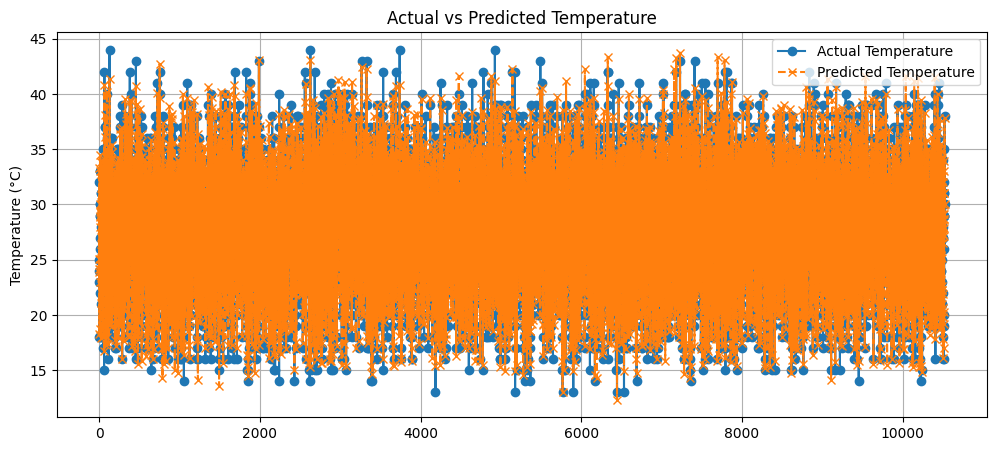

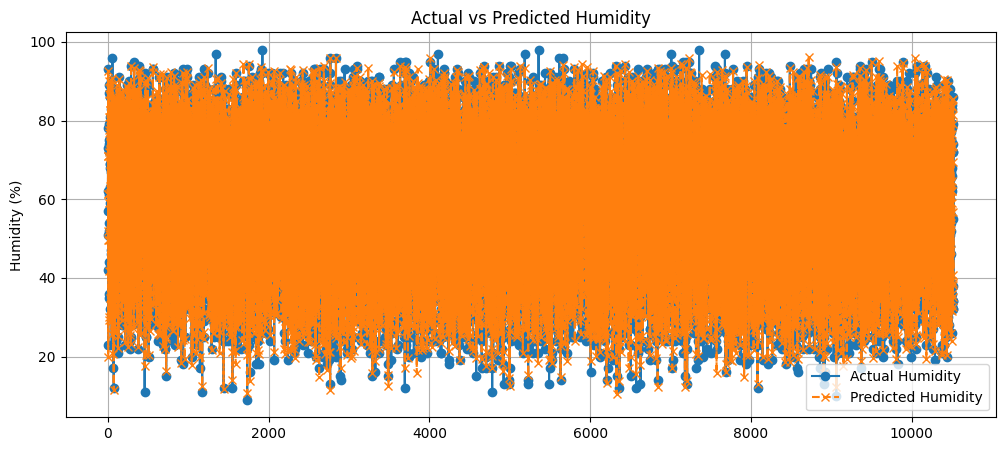

In [4]:
# ---------------------------------------------
# 📦 Import Required Libraries
# ---------------------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from datetime import timedelta

# ---------------------------------------------
# 📥 Load Dataset
# ---------------------------------------------
# Note: adjust path if not using Google Drive
weather_data = pd.read_csv('/content/drive/MyDrive/EE960-AIoT/Temp_and_humidity_dataset.csv')

# ---------------------------------------------
# 🕒 Convert and Sort Date/Time Column
# ---------------------------------------------
weather_data['DATETIME'] = pd.to_datetime(weather_data['DATETIME'])
weather_data = weather_data.sort_values(by='DATETIME')

# ---------------------------------------------
# 📅 Extract Useful Time-Based Features
# ---------------------------------------------
weather_data['date'] = weather_data['DATETIME'].dt.date
weather_data['month'] = weather_data['DATETIME'].dt.month
weather_data['year'] = weather_data['DATETIME'].dt.year
weather_data['day'] = weather_data['DATETIME'].dt.day

# ---------------------------------------------
# 📊 Temperature Aggregation (Daily / Monthly / Yearly)
# ---------------------------------------------
daily_avg = weather_data.groupby('date')['TEMPERATURE'].mean().reset_index()
monthly_avg = weather_data.groupby('month')['TEMPERATURE'].mean().reset_index()
yearly_avg = weather_data.groupby('year')['TEMPERATURE'].mean().reset_index()

# Monthly temperature max/min
monthly_temp_stats = (
    weather_data.groupby(['year', 'month'])['TEMPERATURE']
    .agg(max_temp='max', min_temp='min')
    .reset_index()
)

# ---------------------------------------------
# 💧 Humidity Aggregation (Daily / Monthly / Yearly)
# ---------------------------------------------
daily_humidity_avg = weather_data.groupby('date')['HUMIDITY'].mean().reset_index()
monthly_humidity_avg = weather_data.groupby('month')['HUMIDITY'].mean().reset_index()
yearly_humidity_avg = weather_data.groupby('year')['HUMIDITY'].mean().reset_index()

monthly_humidity_stats = (
    weather_data.groupby(['year', 'month'])['HUMIDITY']
    .agg(max_humidity='max', min_humidity='min')
    .reset_index()
)

# ---------------------------------------------
# 🔁 Add Lag Features (Previous Day)
# ---------------------------------------------
weather_data['temp_lag_1'] = weather_data['TEMPERATURE'].shift(1)
weather_data['humidity_lag_1'] = weather_data['HUMIDITY'].shift(1)

# Drop rows with missing values (due to lag)
weather_data = weather_data.dropna()

# ---------------------------------------------
# 🎯 Prepare Temperature Dataset
# ---------------------------------------------
temp_features = ['month', 'day', 'temp_lag_1']
temp_target = 'TEMPERATURE'

X_temp = weather_data[temp_features]
y_temp = weather_data[temp_target]

# Train/Test Split
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(
    X_temp, y_temp, test_size=0.2, shuffle=True, random_state=42
)

# Train RF Model
rf_temp_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_temp_model.fit(X_train_temp, y_train_temp)

# Temperature Forecast Evaluation
y_temp_pred = rf_temp_model.predict(X_test_temp)
print(f"TEMPERATURE → MAE: {mean_absolute_error(y_test_temp, y_temp_pred):.2f}, "
      f"TEMPERATURE → MSE: {mean_squared_error(y_test_temp, y_temp_pred):.3f}, "
      f"TEMPERATURE → R²: {r2_score(y_test_temp, y_temp_pred):.3f}")

# ---------------------------------------------
# 🎯 Prepare Humidity Dataset
# ---------------------------------------------
humidity_features = ['month', 'day', 'humidity_lag_1']
humidity_target = 'HUMIDITY'

X_hum = weather_data[humidity_features]
y_hum = weather_data[humidity_target]

# Train/Test Split
X_train_hum, X_test_hum, y_train_hum, y_test_hum = train_test_split(
    X_hum, y_hum, test_size=0.2, shuffle=True, random_state=42
)

# Train RF Model
rf_humidity_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_humidity_model.fit(X_train_hum, y_train_hum)

# Humidity Forecast Evaluation
y_hum_pred = rf_humidity_model.predict(X_test_hum)
print(f"HUMIDITY → MAE: {mean_absolute_error(y_test_hum, y_hum_pred):.2f}, "
      f"HUMIDITY → MSE: {mean_squared_error(y_test_hum, y_hum_pred):.3f}, "
      f"HUMIDITY → R²: {r2_score(y_test_hum, y_hum_pred):.3f}")


# ---------------------------------------------
# 🔮 Forecast: Third Week of September
# ---------------------------------------------
forecast_month = 9
forecast_days = list(range(15, 22))

# -----------------
# Temperature Forecast
# -----------------
avg_temp_prev = weather_data[weather_data['month'] == forecast_month]['TEMPERATURE'].mean()

temp_forecast_input = pd.DataFrame({
    'month': [forecast_month]*7,
    'day': forecast_days,
    'temp_lag_1': [avg_temp_prev]*7
})

temp_week_predictions = rf_temp_model.predict(temp_forecast_input)

forecast_temp_week = pd.DataFrame({
    'month': forecast_month,
    'day': forecast_days,
    'predicted_temperature': temp_week_predictions
})

print("\n🌡️ Temperature Forecast for First Week of August:")
print(forecast_temp_week)

# -----------------
# Humidity Forecast
# -----------------
avg_hum_prev = weather_data[weather_data['month'] == forecast_month]['HUMIDITY'].mean()

hum_forecast_input = pd.DataFrame({
    'month': [forecast_month]*7,
    'day': forecast_days,
    'humidity_lag_1': [avg_hum_prev]*7
})

humidity_week_predictions = rf_humidity_model.predict(hum_forecast_input)

forecast_humidity_week = pd.DataFrame({
    'month': forecast_month,
    'day': forecast_days,
    'predicted_humidity': humidity_week_predictions
})

print("\n💧 Humidity Forecast for First Week of August:")
print(forecast_humidity_week)

# ---------------------------------------------
# 📈 Plot: Actual vs Predicted Temperature
# ---------------------------------------------
plt.figure(figsize=(12, 5))  # Set figure size for clarity

# Plot actual temperature values
plt.plot(
    y_test_temp.values,
    label='Actual Temperature',
    marker='o',
    linestyle='-'
)

# Plot predicted temperature values
plt.plot(
    y_temp_pred,
    label='Predicted Temperature',
    marker='x',
    linestyle='--'
)

plt.title("Actual vs Predicted Temperature")   # Chart title
plt.ylabel("Temperature (°C)")                 # Y-axis label
plt.legend()                                   # Show legend
plt.grid(True)                                 # Add light grid for readability
plt.show()                                     # Display the plot


# ---------------------------------------------
# 📈 Plot: Actual vs Predicted Humidity
# ---------------------------------------------
plt.figure(figsize=(12, 5))  # Set figure size

# Plot actual humidity values
plt.plot(
    y_test_hum.values,
    label='Actual Humidity',
    marker='o',
    linestyle='-'
)

# Plot predicted humidity values
plt.plot(
    y_hum_pred,
    label='Predicted Humidity',
    marker='x',
    linestyle='--'
)

plt.title("Actual vs Predicted Humidity")      # Chart title
plt.ylabel("Humidity (%)")                     # Y-axis label
plt.legend()                                   # Show legend
plt.grid(True)                                 # Add grid
plt.show()                                     # Display the plot

